# Prepare Customer Dataframe

1. Import Libraries and Dataframe
2. Data Wrangling and Consistency\
    a. Drop Columns\
    b. Missing Values\
    c. Duplicates\
    d. Mixed Data Types\
    e. Rename Columns\
    f. Statistics
3. Merge Dataframes
    a. Check Data Types of Key
    b. Merge Data
4. Export Data

## 1. Import Libraries and Dataframe

In [2]:
# import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [3]:
# path
path = r'/Users/catherinemikelson/Desktop/Career Foundry/Instacart Basket Analysis/02 Data'

In [4]:
# path_git
path_git = r'/Users/catherinemikelson/Desktop/Career Foundry/Acheivement 4 - Python Fundmentals/Instacart Basket Analysis Github'

In [8]:
# import ords_prods_merged_3
ords_prods_merged = pd.read_pickle(os.path.join(path_git, '02 Data', 'ords_prods_merged_3.pkl'))

In [9]:
# check import
ords_prods_merged.head(5)

,order_id,user_id,order_number,orders_day_of_the_week,order_hour_of_day,days_since_prior_order,new_customer,product_id,add_to_cart_order,reordered,...,price_range_loc,busiest_day,busiest_days,busiest_hour,max_order,loyalty_flag,average_price,spending_flag,median_ord_freq,Frequency_flag
0,2539329,1,1,2,8,NaN,True,196,1,0,...,Mid-range product,Regularly busy,Regularly busy days,average_orders,10,New customer,6.37,Low spender,20.5,Non-frequent customer
1,2398795,1,2,3,7,15.0,False,196,1,1,...,Mid-range product,Regularly busy,Least busy days,average_orders,10,New customer,6.37,Low spender,20.5,Non-frequent customer
2,473747,1,3,3,12,21.0,False,196,1,1,...,Mid-range product,Regularly busy,Least busy days,most_orders,10,New customer,6.37,Low spender,20.5,Non-frequent customer
3,2254736,1,4,4,7,29.0,False,196,1,1,...,Mid-range product,Least busy,Least busy days,average_orders,10,New customer,6.37,Low spender,20.5,Non-frequent customer
4,431534,1,5,4,15,28.0,False,196,1,1,...,Mid-range product,Least busy,Least busy days,most_orders,10,New customer,6.37,Low spender,20.5,Non-frequent customer


In [10]:
# import customers data
customers = pd.read_csv(os.path.join(path_git, '02 Data', 'customers1.csv'))

In [11]:
# check frame
customers.head()

,user_id,First Name,Surnam,Gender,STATE,Age,date_joined,n_dependants,fam_status,income
0,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665
1,33890,Patricia,Hart,Female,New Mexico,36,1/1/2017,0,single,59285
2,65803,Kenneth,Farley,Male,Idaho,35,1/1/2017,2,married,99568
3,125935,Michelle,Hicks,Female,Iowa,40,1/1/2017,0,single,42049
4,130797,Ann,Gilmore,Female,Maryland,26,1/1/2017,1,married,40374


In [15]:
# value counts
customers.shape

(206209, 10)

## 2. Data Wrangling and Consistency

### a. Drop Columns

In [16]:
# drop columns Frist Name and Surnam
customers = customers.drop(columns = ['First Name', 'Surnam'])

In [17]:
# check output
customers.head(5)

,user_id,Gender,STATE,Age,date_joined,n_dependants,fam_status,income
0,26711,Female,Missouri,48,1/1/2017,3,married,165665
1,33890,Female,New Mexico,36,1/1/2017,0,single,59285
2,65803,Male,Idaho,35,1/1/2017,2,married,99568
3,125935,Female,Iowa,40,1/1/2017,0,single,42049
4,130797,Female,Maryland,26,1/1/2017,1,married,40374


### b. Missing Values

In [19]:
# check for missing values
customers.isnull().sum()

user_id         0
Gender          0
STATE           0
Age             0
date_joined     0
n_dependants    0
fam_status      0
income          0
dtype: int64

### c. Duplicates

In [21]:
# check for duplicates
df_dups = customers[customers.duplicated()]

In [22]:
print(df_dups)

Empty DataFrame
Columns: [user_id, Gender, STATE, Age, date_joined, n_dependants, fam_status, income]
Index: []


###  d. Mixed Data Types

In [24]:
# check for mixed data types
for col in customers.columns.tolist():
  weird = (customers[[col]].applymap(type) != customers[[col]].iloc[0].apply(type)).any(axis = 1)
  if len (customers[weird]) > 0:
    print (col)

### e. Rename columns

In [27]:
# rename columns for consistency
customers = customers.rename(columns = {'Gender':'gender', 'STATE':'state', 'Age':'age', 'n_dependants':'number_of_dependants', 'fam_status':'marital_status'})

### f. Statistics

In [29]:
customers.describe()

,user_id,age,number_of_dependants,income
count,206209.000000,206209.000000,206209.000000,206209.000000
mean,103105.000000,49.501646,1.499823,94632.852548
std,59527.555167,18.480962,1.118433,42473.786988
min,1.000000,18.000000,0.000000,25903.000000
25%,51553.000000,33.000000,0.000000,59874.000000
50%,103105.000000,49.000000,1.000000,93547.000000
75%,154657.000000,66.000000,3.000000,124244.000000
max,206209.000000,81.000000,3.000000,593901.000000


Observations: Things look good.  There are no duplicates, no missing values, and the statistcs make sense.

# 3. Merge Dataframes

### a. Check Data Type of Key

In [33]:
# check data type 
ords_prods_merged['user_id'].dtypes

dtype('int64')

In [34]:
# check data type
customers['user_id'].dtypes

dtype('int64')

### b. Merge Data

In [36]:
# merge ords_prods_merged and customers
ords_prods_cust = ords_prods_merged.merge(customers, on = 'user_id')

In [37]:
# check output
ords_prods_cust.head(5)

,order_id,user_id,order_number,orders_day_of_the_week,order_hour_of_day,days_since_prior_order,new_customer,product_id,add_to_cart_order,reordered,...,spending_flag,median_ord_freq,Frequency_flag,gender,state,age,date_joined,number_of_dependants,marital_status,income
0,2539329,1,1,2,8,NaN,True,196,1,0,...,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423
1,2398795,1,2,3,7,15.0,False,196,1,1,...,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423
2,473747,1,3,3,12,21.0,False,196,1,1,...,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423
3,2254736,1,4,4,7,29.0,False,196,1,1,...,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423
4,431534,1,5,4,15,28.0,False,196,1,1,...,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423


In [38]:
# check value counts
ords_prods_cust['_merge'].value_counts()

both          32404859
left_only            0
right_only           0
Name: _merge, dtype: int64

In [39]:
# check shape
ords_prods_cust.shape

(32404859, 32)

## 4. Export Data

In [42]:
# Export customer to pickle
ords_prods_cust.to_pickle(os.path.join(path_git, '02 Data', 'ords_prods_cust.pkl'))

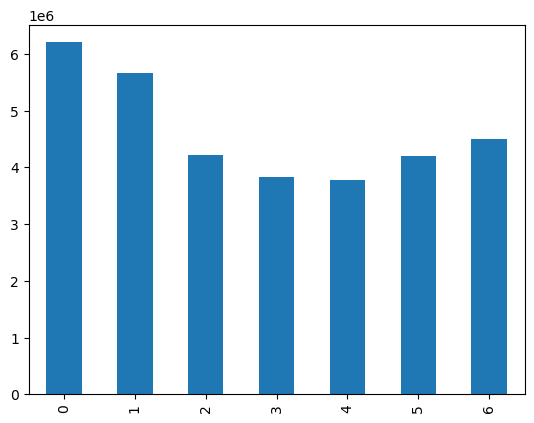

In [7]:
# add sort_index
bar = ords_prods_merged['orders_day_of_the_week'].value_counts().sort_index().plot.bar()

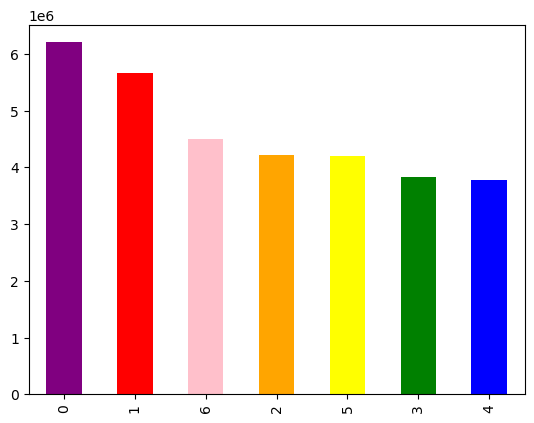

In [8]:
# add color
bar = ords_prods_merged['orders_day_of_the_week'].value_counts().plot.bar(color =['purple', 'red', 'pink', 'orange', 'yellow', 'green', 'blue'])

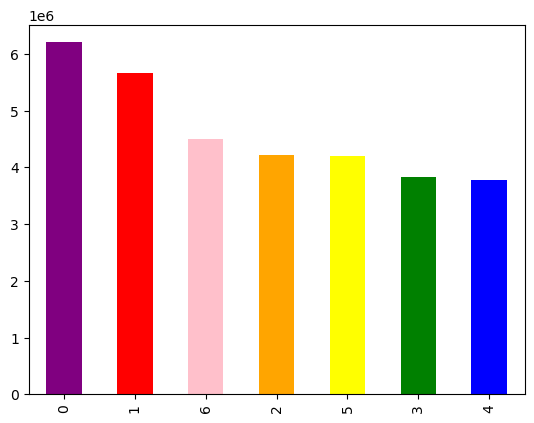

In [9]:
bar.figure

In [10]:
# create path_2 to instacart folder
path_ic = r'/Users/catherinemikelson/Desktop/Career Foundry/Instacart Basket Analysis'

In [11]:
# save chart
bar.figure.savefig(os.path.join(path_ic, '04 Analysis', 'Visualizations', 'bar_orders_dow.png'))

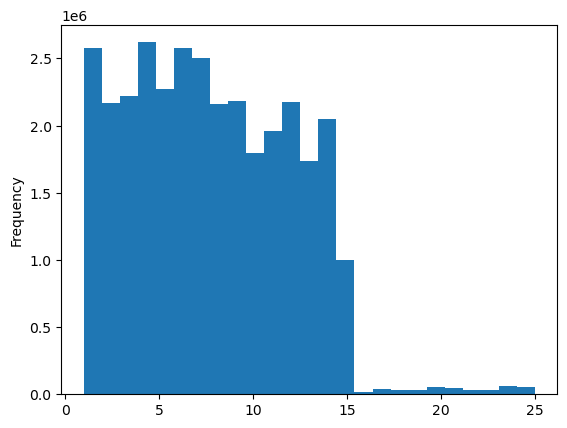

In [12]:
hist = ords_prods_merged['prices'].plot.hist(bins = 25)

In [13]:
# save chart
hist.figure.savefig(os.path.join(path_ic, '04 Analysis', 'Visualizations', 'hist_prices.png'))

In [14]:
# Create a list holing True/False values to the test np.random.rand() <= 0.7
np.random.seed(4)
dev = np.random.rand(len(ords_prods_merged)) <= 0.7

In [16]:
# Store 70% of the sample in the dataframe big
big = ords_prods_merged[dev]

In [17]:
# Store 30% of the sample in the dataframe small
small = ords_prods_merged[~dev]

In [18]:
# Check data set size
len(ords_prods_merged)

32404859

In [19]:
# Check sample sizes
len(big) + len(small)

32404859

In [20]:
# Create order/prices data set with small
df_2 = small[['orders_day_of_the_week', 'prices']]

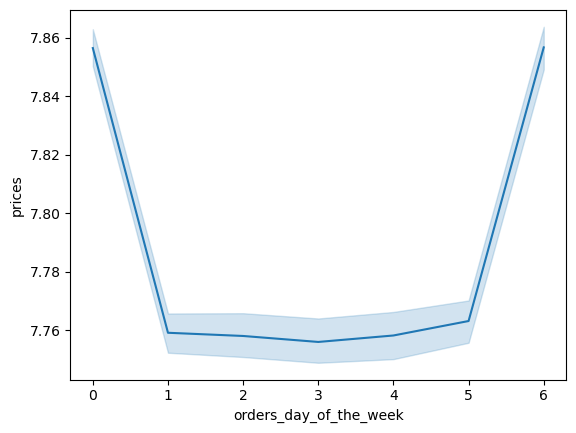

In [21]:
# Line chart for day of the week/prices
line = sns.lineplot(data = df_2, x = 'orders_day_of_the_week', y = 'prices')

In [22]:
# save line chart as line_prices_dow.png
line.figure.savefig(os.path.join(path_ic, '04 Analysis', 'Visualizations', 'line_prices_dow.png'))

,order_id,user_id,order_number,orders_day_of_the_week,order_hour_of_day,days_since_prior_order,new_customer,product_id,add_to_cart_order,reordered,...,price_range_loc,busiest_day,busiest_days,busiest_hour,max_order,loyalty_flag,average_price,spending_flag,median_ord_freq,Frequency_flag
0,2539329,1,1,2,8,NaN,True,196,1,0,...,Mid-range product,Regularly busy,Regularly busy days,average_orders,10,New customer,6.37,Low spender,20.5,Non-frequent customer
1,2398795,1,2,3,7,15.0,False,196,1,1,...,Mid-range product,Regularly busy,Least busy days,average_orders,10,New customer,6.37,Low spender,20.5,Non-frequent customer
2,473747,1,3,3,12,21.0,False,196,1,1,...,Mid-range product,Regularly busy,Least busy days,most_orders,10,New customer,6.37,Low spender,20.5,Non-frequent customer
3,2254736,1,4,4,7,29.0,False,196,1,1,...,Mid-range product,Least busy,Least busy days,average_orders,10,New customer,6.37,Low spender,20.5,Non-frequent customer
4,431534,1,5,4,15,28.0,False,196,1,1,...,Mid-range product,Least busy,Least busy days,most_orders,10,New customer,6.37,Low spender,20.5,Non-frequent customer
